<a href="https://colab.research.google.com/github/arthurvignati/IA/blob/main/A2_Search_Algorithms_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10409688, Arthur Vignati Moscardi' #@param {type:"string"}
Aluno2 = '10402685, Enzo Bernal de Matos' #@param {type:"string"}
Aluno3 = '10409669, Ian Miranda Da Cunha' #@param {type:"string"}
Aluno4 = '10409729, Pedro Pessuto Rodrigues Ferreira' #@param {type:"string"}
Aluno5 = '' #@param {type:"string"}



# **Resumo**

Neste trabalho é efetuada a criação de um grafo de no mínimo 24 cidades e no mínimo 6 caminhos alternativos ligando duas cidades brasileiras, sendo elas São Paulo e Rio de janeiro pela escolha do grupo. Implementando assim um algoritmo de busca BFS e posteriormente o algoritmo de busca informada A\*.

# **Implementação**

#Instalação de Bibliotecas

Para a criação e manipulação do grafo, utilizaremos a biblioteca `networkx`. A célula de código a seguir garante que ela esteja instalada no ambiente do Google Colab. A `matplotlib`, que será usada para a visualização, já vem pré-instalada.



In [ ]:
# Instalação da biblioteca networkx.
!pip install networkx

## **1. Grafo das cidades (2,0)**

# Criação do grafo
O código a seguir é responsável por toda a criação do nosso grafo. O processo foi dividido em três partes principais:

1.  **Inicialização do Grafo:** Um objeto de grafo não direcionado (`nx.Graph`) é criado. Escolhemos um grafo não direcionado, pois as distâncias rodoviárias entre duas cidades são as mesmas em ambos os sentidos.
2.  **Adição dos Nós (Cidades):** Uma lista com 24 cidades brasileiras é definida e adicionada ao grafo como nós.
3.  **Adição das Arestas (Conexões):** Uma lista de conexões é criada. Cada conexão representa uma estrada entre duas cidades e possui um atributo `weight` (peso), que corresponde à distância em quilômetros. Essa lista foi feita para incluir pelo menos 6 rotas alternativas entre São Paulo e Rio de Janeiro, além de outras conexões para garantir que o grafo seja conexo e mais completo.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria grafo não direcionado.
G = nx.Graph()

# Adiciona as 24 cidades (nós) ao grafo.
cidades = [
    "Sao Paulo", "Rio de Janeiro", "Belo Horizonte", "Curitiba", "Florianopolis",
    "Porto Alegre", "Brasilia", "Goiania", "Salvador", "Recife", "Fortaleza",
    "Manaus", "Belem", "Campo Grande", "Cuiaba", "Vitoria", "Santos",
    "Campinas", "Sao Jose dos Campos", "Taubate", "Resende", "Volta Redonda",
    "Juiz de Fora", "Ubatuba"
]
G.add_nodes_from(cidades)

# Adiciona as conexões (arestas) com os custos (distâncias em km).
conexoes = [

    # Caminhos São Paulo - Rio de Janeiro
    ("Sao Paulo", "Sao Jose dos Campos", 97),
    ("Sao Jose dos Campos", "Taubate", 45),
    ("Taubate", "Resende", 150),
    ("Resende", "Rio de Janeiro", 170),
    ("Resende", "Volta Redonda", 40),
    ("Volta Redonda", "Rio de Janeiro", 130),
    ("Sao Jose dos Campos", "Rio de Janeiro", 338),
    ("Sao Jose dos Campos", "Ubatuba", 143),
    ("Ubatuba", "Rio de Janeiro", 225),
    ("Sao Paulo", "Belo Horizonte", 586),
    ("Sao Paulo", "Campinas", 99),
    ("Campinas", "Belo Horizonte", 580),
    ("Belo Horizonte", "Juiz de Fora", 285),
    ("Juiz de Fora", "Rio de Janeiro", 186),

    # Conexões entre o restante das cidades
    ("Sao Paulo", "Curitiba", 408),
    ("Sao Paulo", "Santos", 77),
    ("Curitiba", "Florianopolis", 301),
    ("Florianopolis", "Porto Alegre", 476),
    ("Sao Paulo", "Campo Grande", 1014),
    ("Campo Grande", "Cuiaba", 710),
    ("Cuiaba", "Brasilia", 1133),
    ("Brasilia", "Goiania", 209),
    ("Goiania", "Belo Horizonte", 906),
    ("Belo Horizonte", "Vitoria", 524),
    ("Rio de Janeiro", "Vitoria", 521),
    ("Belo Horizonte", "Salvador", 1372),
    ("Salvador", "Recife", 839),
    ("Recife", "Fortaleza", 800),
    ("Salvador", "Brasilia", 1446),
    ("Belem", "Salvador", 2100),
    ("Belem", "Manaus", 4335)
]

# Adiciona as arestas com o atributo 'weight' (peso)
for cidade1, cidade2, distancia in conexoes:
    G.add_edge(cidade1, cidade2, weight=distancia)

print("Grafo efetuado com sucesso!")
print(f"Número de cidades (nós): {G.number_of_nodes()}")
print(f"Número de conexões (arestas): {G.number_of_edges()}")



Grafo efetuado com sucesso!
Número de cidades (nós): 24
Número de conexões (arestas): 31


> ## **1.1. Resultados (Testes)**

Para verificar se o grafo foi construído corretamente, realizamos um teste fundamental: a sua visualização. O código a seguir irá desenhar o grafo, exibindo as cidades (nós), as estradas (arestas) e as distâncias (pesos das arestas).

Para garantir uma visualização clara e evitar a sobreposição de nós, optamos por usar o layout `spring_layout`, ajustando cuidadosamente seus principais parâmetros:

*   **`figsize=(25, 25)`:** Define uma área de desenho grande para que o grafo tenha espaço suficiente para se expandir sem que os nós fiquem aglomerados.
*   **`k=3.7`:** Controla a distância ideal entre os nós. Um valor alto foi escolhido para forçar um maior espaçamento.
*   **`iterations=200`:** Define o número de iterações da simulação. Um valor elevado garante que o layout se estabilize em uma posição de baixa energia, resultando em uma visualização mais organizada.
*   **`seed=42`:** Garante que a visualização seja sempre a mesma a cada execução, o que é crucial para a reprodutibilidade dos resultados.


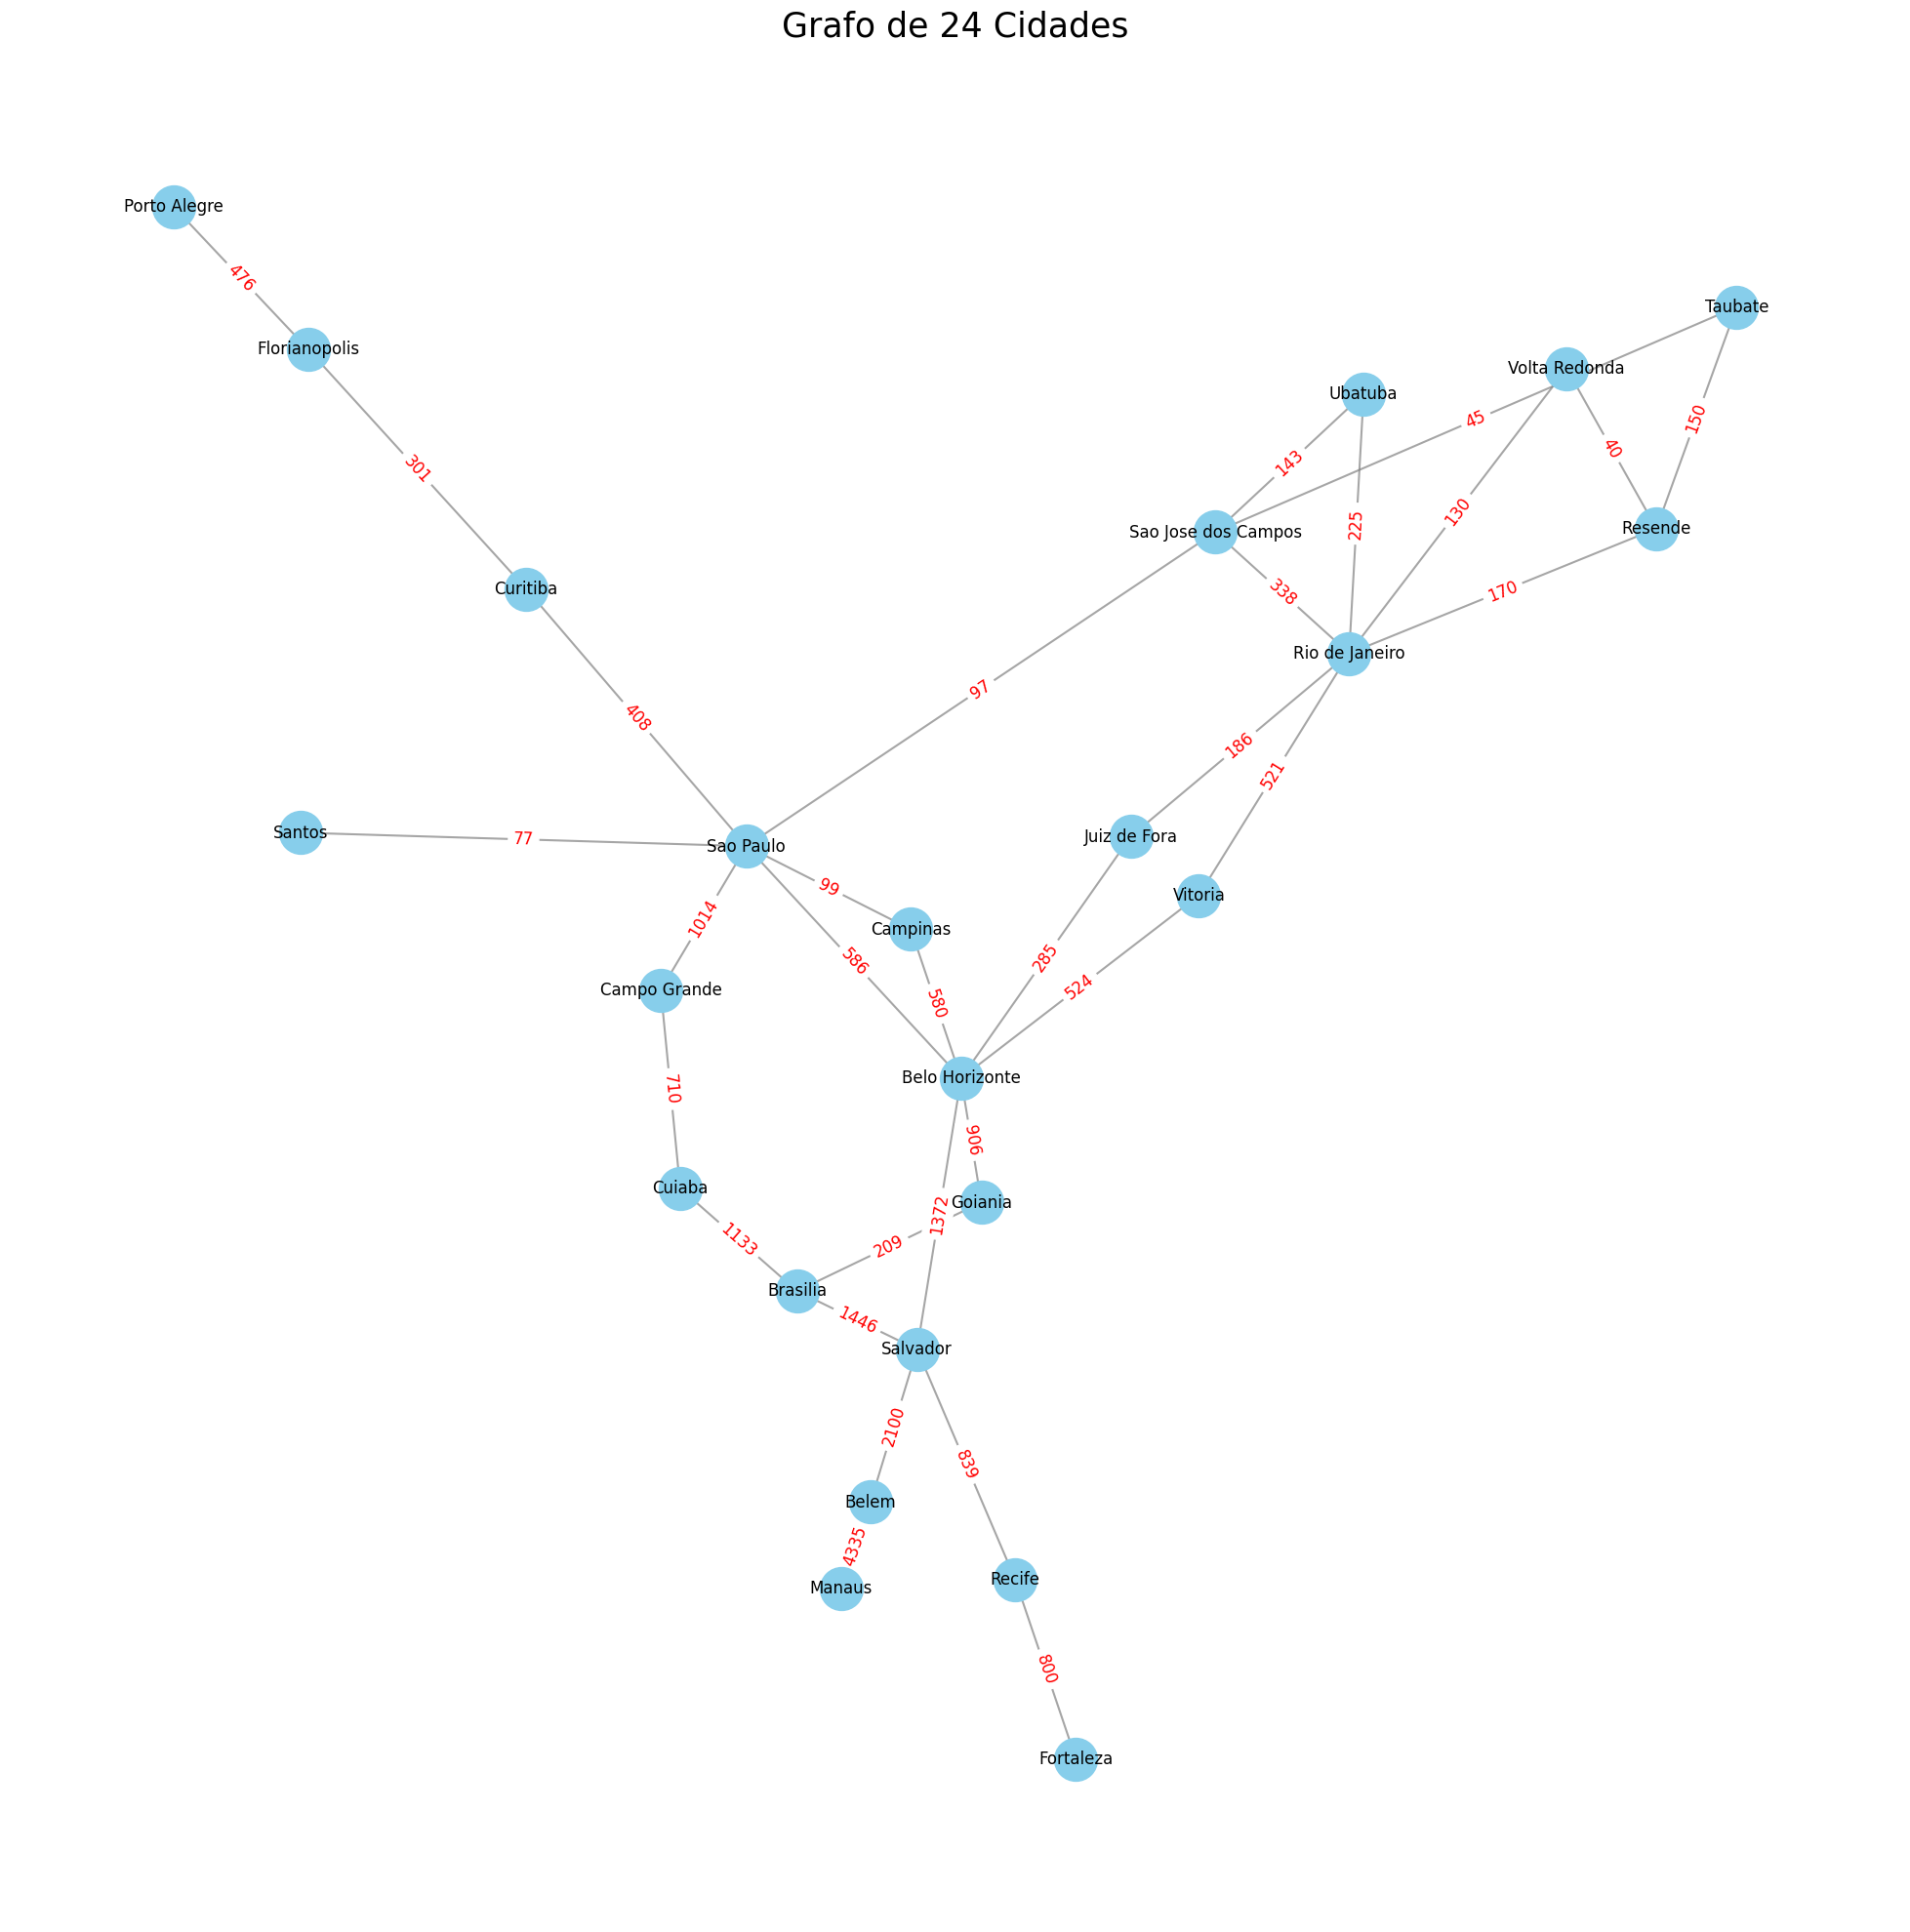

In [ ]:
plt.figure(figsize=(25, 25))

# Ajuste dos parâmetros do layout:
pos = nx.spring_layout(G, k=3.7, iterations=200, seed=42)

# Desenha os componentes do grafo
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Desenha os rótulos das arestas (pesos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='red')

plt.title("Grafo de 24 Cidades", size=25)
plt.axis('off')
plt.show()


## **2. BFS, Breadth-First Search(2,0)**

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

## **3. Busca Informada (5,0)**

Na próxima etapa do projeto optamos pela escolha da busca informada A\*

A razão pela qual escolhemos essa busca se da pela característica de que ele é um algoritmo ótimo, sendo assim, ele garante encontrar o caminho de menor custo, que é o objetivo do problema.

Ele garante ao avaliar os nós pelo custo real já percorrido desde a origem até o nó 'n' e a estimativa heurística do custo de 'n' até o destino, ou seja, o A\* evita ser enganado por caminhos que parecem promissores no curto prazo e que se revelam mais custosos no final.

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

TOKUZUMI, Ricardo. Laboratório 2 - Buscas Heurísticas. In: AI Labs. [S. l.], 2020. Disponível em: https://ricwtk.github.io/ai-labs/lab2/. Acesso em: 2 set. 2025.

DERKOWSKI, Jake. RomaniaProblemAI: A demonstration of search algorithms on the Romania map problem. [S. l.]: GitHub, 2021. Repositório de software. Disponível em: https://github.com/JakeDerkowski96/RomaniaProblemAI. Acesso em: 2 set. 2025.

OLIVEIRA, Rogério de. Search_Algorithms.ipynb. In: IA_2025S2. [S. l.]: GitHub, 2024. Notebook Google Colaboratory. Disponível em: https://colab.research.google.com/github/Rogerio-mack/IA_2025S2/blob/main/Search_Algorithms.ipynb. Acesso em: 2 set. 2025.


GOOGLE MAPS. Rotas e distâncias rodoviárias. Mountain View, CA: Google, 2024. Disponível em: https://www.google.com/maps. Acesso em: 2 set. 2025.


---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

NameError: name 'Resumo' is not defined